# **Decision Trees**
### Objectives
After completing this lab you will be able to:
* Develop a classification model using Decision Tree Algorithm

In this lab exercise, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.


---

In [1]:
# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

## **About the Dataset**

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same ilçness. During their course of treatment, each patient responded to one fo 5 medications, Drug A, Drug B, Drug c, Drug x and Drug y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

### Downloading the Data

To download the data, we will use !wget to download it from IBM Object Storage.

In [3]:
!wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

--2021-06-02 02:16:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5.7K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.69K  --.-KB/s    in 0s      

2021-06-02 02:16:45 (941 MB/s) - ‘drug200.csv’ saved [5827/5827]



In [4]:
# Reading the data
df = pd.read_csv("drug200.csv", delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


What is the size of the data?

In [6]:
df.shape

(200, 6)

## **Pre-processing**

Using ``df`` as the Drug.csv data read by pandas, declare the following variables:
* X as the Feature Matrix (data of df)
* y as the response vector (target)

Remove the column containing the target name since it doesn't contain numeric values.

In [12]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical, such as Sex or BP. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using ``pandas.get_dummies()`` to convert the categorical variable into dummy/indicator variables.

In [13]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

In [18]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now, we can set the target variable

In [20]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

---

## **Setting up the Decision Tree**

We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.

In [21]:
from sklearn.model_selection import train_test_split

The ``train_test_split`` will return 4 different parameters. We will name them:
X_trainset, X__testset, y_trainset, y_testset

The ``train_test_split`` will need the parameters:
X, y, test_size=0.3, and random_state=3.

The X and y are the arrays required before split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [25]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Let's ensure that the X_trainset and y_trainset dimensions match

In [28]:
print("X trainig set dimension: {}".format(X_trainset.shape[0]))
print("Y training set dimension: {}".format(y_trainset.shape[0]))

X trainig set dimension: 140
Y training set dimension: 140


Ensuring that the X_testset and y_testset dimensions match

In [29]:
print("X test set dimension: {}".format(X_testset.shape[0]))
print("Y test set dimension: {}".format(y_testset.shape[0]))

X test set dimension: 60
Y test set dimension: 60


---

## **Modeling**

We will first create an instance of the DecisionTreeClassifier called drugTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [30]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [31]:
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

---


## **Prediction**
Let1s make some predictions on the testing dataset and store it into a variable called predTree.

In [32]:
predTree = drugTree.predict(X_testset)

You can print out predTree and y_testset if you want to visually compare the predictions to the actual values.

In [33]:
print(predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


---

## **Evaluation**

Next, let's import metrics from sklearn and check the accuracy of our model.


In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTree's Accuracy:  0.9833333333333333


---

## **Visualization**


In [50]:
import pydotpus 

ModuleNotFoundError: ignored

In [52]:
!pip install pydotplus

In [56]:
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

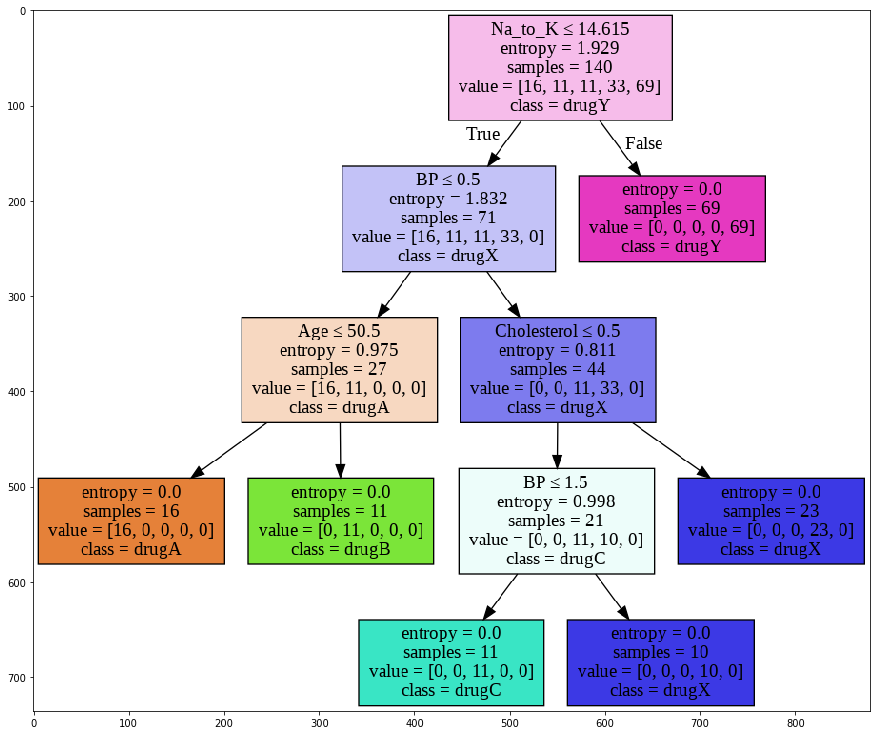

In [64]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
out = tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, 
                           class_names=np.unique(y_trainset), filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(15, 30))
plt.imshow(img, interpolation='nearest');